# Correct experiments for specific configuration
Note: the values are superiors for 100 % because the standar deviation...something is wrong


In [1]:
import os
import sys
import tarfile

import numpy as np

from skimage import io
from skimage import color
from skimage.feature import hog

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [2]:

path_severo = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/SEVERO/'
path_moderado = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/MODERADO/'
images_moderado = os.listdir(path_moderado)
images_severo = os.listdir(path_severo)

print(len(images_severo))
print(len(images_moderado))
print(images_severo)

29
21
['MCI-SiC8.TIF', 'MCI-SiC11.TIF', 'MCI-SiC12.TIF', 'MCI-SiC4.TIF', 'MartWCI-GARNET5.TIF', 'MartWCI-GARNET2.TIF', 'MCI-SiC13.TIF', 'MartWCI-GARNET8.TIF', 'MCI-GARNET1.TIF', 'MCI-GARNET2.TIF', 'MartWCI-GARNET6.TIF', 'MCI-GARNET7.TIF', 'MCI-GARNET4.TIF', 'MCI-SiC9.TIF', 'MCI-GARNET5.TIF', 'MartWCI-GARNET7.TIF', 'MartWCI-GARNET4.TIF', 'MartWCI-GARNET3.TIF', 'MCI-SiC7.TIF', 'MCI-GARNET6.TIF', 'MCI-SiC10.TIF', 'MCI-SiC3.TIF', 'MCI-SiC5.TIF', 'MCI-GARNET3.TIF', 'MCI-SiC6.TIF', 'MCI-SiC1.TIF', 'MCI-SiC2.TIF', 'MCI-SiC14.TIF', 'MartWCI-GARNET1.TIF']


### Compuring again Hog Descriptor

Correction by computing **standard error of mean or standard deviation of the mean** instead the **standard deviation**

In [3]:
print(len(images_severo))
print(len(images_moderado))

def Hog_wear(orient_iter, iter_pix_cell, iter_cell_block, p_moderado=images_moderado, p_severo=images_severo):
    from skimage import io
 #   import matplotlib.pyplot as plt
    import numpy as np
    from skimage import color
    from skimage.feature import hog
    #get_ipython().run_line_magic('matplotlib', 'inline')

    X=[] # descriptor

    #moderado
    for image_path in p_moderado:
        image_file = os.path.join(path_moderado, image_path)
        image = color.rgb2gray(io.imread(image_file))
        fd = hog(image, orientations=orient_iter, pixels_per_cell=(iter_pix_cell, iter_pix_cell),
                 cells_per_block=(iter_cell_block, iter_cell_block), block_norm="L2-Hys")
        X.append(fd)
    #X = np.vstack(X,fd) 

    #severo
    for image_path in p_severo:
        image_file = os.path.join(path_severo, image_path)
        image = color.rgb2gray(io.imread(image_file))
        fd = hog(image, orientations=orient_iter, pixels_per_cell=(iter_pix_cell, iter_pix_cell),
                 cells_per_block=(iter_cell_block, iter_cell_block), block_norm="L2-Hys")
        X.append(fd)
    
    X = np.r_[X]
    y=[]

    lab_mod = np.zeros(len(images_moderado)).astype(int).transpose()
    lab_sev = np.ones(len(images_severo)).astype(int).transpose()
    y = np.concatenate( (lab_mod, lab_sev), axis=0)
    y = np.r_[y]
    #print("X.shape: ", X.shape, " y.shape: ", y.shape)
    #print(type(X))
    return X, y


29
21


In [4]:
X, y = Hog_wear(16, 16, 4)
print("X.shape: ", X.shape, " y.shape: ", y.shape)

X.shape:  (50, 283392)  y.shape:  (50,)


In [26]:
nfolds_range = range(2,len(images_severo)+len(images_moderado))
orient_iter  = 16
iter_pix_cell = 64
iter_cell_block = 4

mean_Gauss =[];std_Gauss =[];sem_Gauss =[]
mean_Tree  =[];std_Tree  =[];sem_Tree  =[]
mean_RaF   =[];std_RaF  =[];sem_RaF  =[] 


for folds in nfolds_range:
    print('folds: ', folds)
    print('orient_iter: ', orient_iter, ' iter_pix_cell: ', iter_pix_cell,' iter_cell_block: ', iter_cell_block)
    X, y = Hog_wear(orient_iter, iter_pix_cell, iter_cell_block)
    s_Gauss = cross_val_score(GaussianNB(), X, y, cv=KFold(folds, shuffle=True), scoring=make_scorer(accuracy_score))
    s_Tree = cross_val_score(DecisionTreeClassifier(), X, y, cv=KFold(folds, shuffle=True), scoring=make_scorer(accuracy_score))
    s_RaF = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(folds, shuffle=True), scoring=make_scorer(accuracy_score))
    mean_Gauss.append(np.mean(s_Gauss)); sem_Gauss.append(np.std(s_Gauss)/np.sqrt(len(s_Gauss)))
    std_Gauss.append(np.std(s_Gauss))
    mean_Tree.append(np.mean(s_Tree)); sem_Tree.append(np.std(s_Tree)/np.sqrt(len(s_Tree)))
    std_Tree.append(np.std(s_Tree))
    mean_RaF.append(np.mean(s_RaF)); sem_RaF.append(np.std(s_RaF)/np.sqrt(len(s_RaF)))
    std_RaF.append(np.std(s_RaF))
    
    
    #print(s_Gauss)
    print("len: ", len(s_Gauss))
    #print("accuracy: %.2f (+/- %.2f) %.2f"%(np.mean(s_Gauss), np.std(s_Gauss), np.std(s_Gauss)/np.sqrt(len(s_Gauss))))
    

folds:  2
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  2
folds:  3
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  3
folds:  4
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  4
folds:  5
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  5
folds:  6
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  6
folds:  7
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  7
folds:  8
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  8
folds:  9
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  9
folds:  10
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  10
folds:  11
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  11
folds:  12
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  12
folds:  13
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  13
folds:  14
orient_iter:  16  iter_pix_cell:  64  iter_cell_block:  4
len:  14
fo

In [21]:
name ='o'+str(orient_iter)+'c'+str(iter_pix_cell)+'b'+str(iter_cell_block)
try:
    with open('meanGauss_'+name+'.txt', 'w') as gauss_file:
        with open('meanRaF_'+name+'.txt', 'w') as RaF_file:
            with open('meanTree_'+name+'.txt', 'w') as Tree_file:
                for a in range(len(mean_Gauss)):
                    gauss_file.write("%i %.2f %.2f %.2f \n"%(a+2, mean_Gauss[a], std_Gauss[a], sem_Gauss[a]))
                    RaF_file.write("%i %.2f %.2f %.2f \n"%(a+2, mean_RaF[a], std_RaF[a], sem_RaF[a]))
                    Tree_file.write("%i %.2f %.2f %.2f \n"%(a+2, mean_Tree[a], std_Tree[a], sem_Tree[a]))
except IOError as e:
    print('Operation failed: %s' % e.strerror)

# K-fold to o16c16b4

38 0.9125 0.9125
21 0.9275362318840579 0.9275362318840579
36


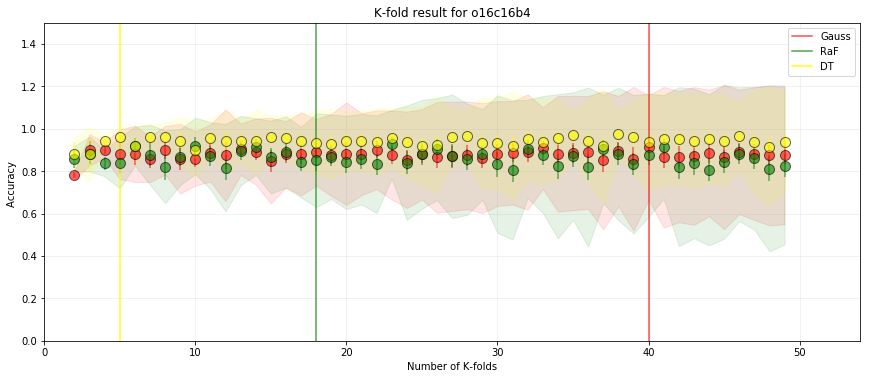

In [29]:
plt.figure(figsize=(12,5))


print(np.argmax(mean_Gauss), np.max(mean_Gauss), mean_Gauss[np.argmax(mean_Gauss)])
print(np.argmax(mean_RaF), np.max(mean_RaF), mean_RaF[np.argmax(mean_RaF)])
print(np.argmax(mean_Tree))



#mas dos por la incialización
plt.axvline(40, color="red", alpha=0.7)
plt.axvline(18, color="green",  alpha=0.7)
plt.axvline(5, color="yellow",  alpha=0.9)

plt.fill_between(nfolds_range, np.r_[mean_Gauss]-np.r_[std_Gauss], np.r_[mean_Gauss]+np.r_[std_Gauss], color="red", alpha=.1)
plt.fill_between(nfolds_range, np.r_[mean_RaF]-np.r_[std_RaF], np.r_[mean_RaF]+np.r_[std_RaF], color="green", alpha=.1)
plt.fill_between(nfolds_range, np.r_[mean_Tree]-np.r_[std_Tree], np.r_[mean_Tree]+np.r_[std_Tree], color="yellow", alpha=.1)


plt.errorbar(x=nfolds_range, y=mean_Gauss, yerr= sem_Gauss
             , c= "red",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="Gauss")
plt.errorbar(x=nfolds_range, y=mean_RaF, yerr= sem_RaF
             , c= "green",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="RF")
plt.errorbar(x=nfolds_range, y=mean_Tree, yerr= sem_Tree
             , c= "yellow",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="DT")


plt.legend(['Gauss', 'RaF',  "DT"])
plt.ylim([0.0, 1.5])
plt.xlim([0.0, 54])
plt.tight_layout()

plt.xlabel("Number of K-folds")
plt.ylabel("Accuracy ")
plt.title("K-fold result for o16c16b4")
plt.grid(alpha=0.2)
plt.savefig("corr_kfold_o16c16b4_result.pdf")
plt.savefig("corr_kfold_o16c16b4_result.png")
plt.show()

# K-fold to o16c64b4

38
21
36


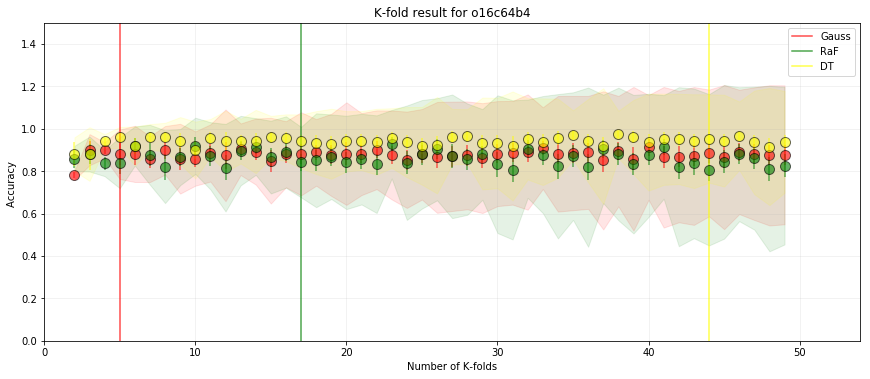

In [30]:
plt.figure(figsize=(12,5))

print(np.argmax(mean_Gauss))
print(np.argmax(mean_RaF))
print(np.argmax(mean_Tree))

plt.fill_between(nfolds_range, np.r_[mean_Gauss]-np.r_[std_Gauss], np.r_[mean_Gauss]+np.r_[std_Gauss], color="red", alpha=.1)
plt.fill_between(nfolds_range, np.r_[mean_RaF]-np.r_[std_RaF], np.r_[mean_RaF]+np.r_[std_RaF], color="green", alpha=.1)
plt.fill_between(nfolds_range, np.r_[mean_Tree]-np.r_[std_Tree], np.r_[mean_Tree]+np.r_[std_Tree], color="yellow", alpha=.1)



plt.axvline(5, color="red", alpha=0.7)
plt.axvline(17, color="green",  alpha=0.7)
plt.axvline(44, color="yellow",  alpha=0.7)

plt.errorbar(x=nfolds_range, y=mean_Gauss, yerr= sem_Gauss
             , c= "red",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="Gauss")
plt.errorbar(x=nfolds_range, y=mean_RaF, yerr= sem_RaF
             , c= "green",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="RF")
plt.errorbar(x=nfolds_range, y=mean_Tree, yerr= sem_Tree
             , c= "yellow",markersize= 10, alpha=0.6,fmt='o', markeredgecolor="black" ,  label="DT")


plt.legend(['Gauss', 'RaF',  "DT"])
plt.ylim([0.0, 1.5])
plt.xlim([0.0, 54])
plt.tight_layout()

plt.xlabel("Number of K-folds")
plt.ylabel("Accuracy ")
plt.title("K-fold result for o16c64b4")
plt.grid(alpha=0.2)
plt.savefig("corr_kfold_o16c64b4_result.pdf")
plt.savefig("corr_kfold_o16c64b4_result.png")
plt.show()

In [ ]:
# K-fold to o32c64b42 